In [1]:
import pandas as pd
import numpy as np

In [2]:
df_rating = pd.read_csv("C:/Users/91995/Downloads/archive/ml-100k/u.data", sep="\t")
df_rating.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
df_rating

,user_id,movie_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806
...,...,...,...,...
99994,880,476,3,880175444
99995,716,204,5,879795543
99996,276,1090,1,874795795
99997,13,225,2,882399156


In [3]:
len(df_rating['movie_id'].unique())

1682

In [4]:
df_rating = df_rating.drop(['timestamp'], axis=1)
df_rating

,user_id,movie_id,rating
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4
...,...,...,...
99994,880,476,3
99995,716,204,5
99996,276,1090,1
99997,13,225,2


In [5]:
df_rating

,user_id,movie_id,rating
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4
...,...,...,...
99994,880,476,3
99995,716,204,5
99996,276,1090,1
99997,13,225,2


In [6]:
len(df_rating.loc[(df_rating['user_id']==186) & (df_rating['movie_id']==302)])

1

In [7]:
#df_rating.loc[(df_rating['user_id']==186) & (df_rating['movie_id']==302), 'rating'] = 4
# df_rating.loc[len(df_rating.index)] = [500, 500, 3]
df_rating.tail(10)

,user_id,movie_id,rating
99989,806,421,4
99990,676,538,4
99991,721,262,3
99992,913,209,2
99993,378,78,3
99994,880,476,3
99995,716,204,5
99996,276,1090,1
99997,13,225,2
99998,12,203,3


In [8]:
rating_counts = df_rating.groupby('user_id')['rating'].count()
rating_counts

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: rating, Length: 943, dtype: int64

In [9]:
print(max(rating_counts.values))

737


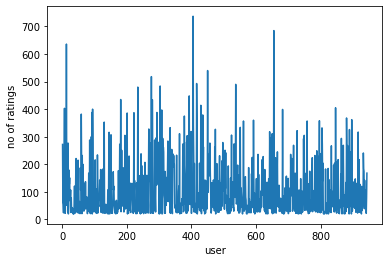

In [10]:
import matplotlib.pyplot as plt

plt.plot(rating_counts.index, rating_counts.values)
plt.xlabel('user')
plt.ylabel('no of ratings')
plt.show()

In [11]:
df_rating2 = df_rating.groupby('user_id').filter(lambda x: len(x) >= 270)
df_rating2

,user_id,movie_id,rating
10,286,1014,5
14,303,785,3
16,194,274,2
17,291,1042,4
18,234,1184,2
...,...,...,...
99981,279,64,1
99993,378,78,3
99994,880,476,3
99996,276,1090,1


In [12]:
df_user = pd.read_csv('C:/Users/91995/Downloads/archive/ml-100k/u.user', sep='|', header=None)
df_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [13]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
df_user['gender'] = en.fit_transform(df_user['gender'])
df_user

,user_id,age,gender,occupation,zip_code
0,1,24,1,technician,85711
1,2,53,0,other,94043
2,3,23,1,writer,32067
3,4,24,1,technician,43537
4,5,33,0,other,15213
...,...,...,...,...,...
938,939,26,0,student,33319
939,940,32,1,administrator,02215
940,941,20,1,student,97229
941,942,48,0,librarian,78209


In [14]:
item_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url']
genre_cols = ['unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
              'drama','fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 
              'war','western']

df_item_genre = pd.read_csv('C:/Users/91995/Downloads/archive/ml-100k/u.item', sep='|',encoding='latin-1')
df_item_genre.columns = item_cols + genre_cols
df_item_genre

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
len(df_item_genre['movie_title'].unique())

1663

In [16]:
df_item_genre['movie_title'].isnull().sum()

0

In [17]:
df_item = df_item_genre[item_cols]
df_item

,movie_id,movie_title,release_date,video_release_date,imdb_url
0,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
1,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
2,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
3,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [18]:
df_genre = df_item_genre[['movie_id'] + genre_cols]
df_genre

,movie_id,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
def convert_onehot_to_category(df, id_col, one_hot_columns, category_col='category'):
    df_concat = pd.DataFrame(columns=[id_col, category_col])
    for col in one_hot_columns:
        df_each = df[df[col] >= 1][[id_col, col]]
        df_each[col] = col

        df_each.columns = [id_col, category_col]
        df_concat = pd.concat([df_concat, df_each], axis=0)
    df_concat = df_concat.drop_duplicates().reset_index(drop=True)
    
    return df_concat

In [20]:
use_item_cols = ['movie_id', 'movie_title', 'release_date']
df_item = df_item[use_item_cols]

#use_genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller','war','western']
use_genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'drama', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller']
df_genre2 = df_genre[['movie_id'] + use_genre_cols]
df_genre2

,movie_id,action,adventure,animation,children,comedy,crime,drama,horror,musical,mystery,romance,sci_fi,thriller
0,2,1,1,0,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,1,0,0,0,1,0,1,0,0,0,0,0,0
3,5,0,0,0,0,0,1,1,0,0,0,0,0,1
4,6,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,0,0,0,0,0,0,1,0,0,0,0,0,0
1677,1679,0,0,0,0,0,0,0,0,0,0,1,0,1
1678,1680,0,0,0,0,0,0,1,0,0,0,1,0,0
1679,1681,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df_item

,movie_id,movie_title,release_date
0,2,GoldenEye (1995),01-Jan-1995
1,3,Four Rooms (1995),01-Jan-1995
2,4,Get Shorty (1995),01-Jan-1995
3,5,Copycat (1995),01-Jan-1995
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995
...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998
1677,1679,B. Monkey (1998),06-Feb-1998
1678,1680,Sliding Doors (1998),01-Jan-1998
1679,1681,You So Crazy (1994),01-Jan-1994


In [22]:
df_genre2 = convert_onehot_to_category(df_genre, 'movie_id', use_genre_cols, category_col='genre')
df_genre2

,movie_id,genre
0,2,action
1,4,action
2,17,action
3,21,action
4,22,action
...,...,...
2689,1625,thriller
2690,1651,thriller
2691,1670,thriller
2692,1673,thriller


In [23]:
df_genre2 = df_genre2.groupby('movie_id').agg(list).reset_index()
df_genre2

,movie_id,genre
0,2,"[action, adventure, thriller]"
1,3,[thriller]
2,4,"[action, comedy, drama]"
3,5,"[crime, drama, thriller]"
4,6,[drama]
...,...,...
1606,1678,[drama]
1607,1679,"[romance, thriller]"
1608,1680,"[drama, romance]"
1609,1681,[comedy]


In [24]:
df = pd.merge(df_rating, df_item, on='movie_id')
df = pd.merge(df, df_genre, on='movie_id')
df = pd.merge(df, df_user, on='user_id')
df

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,mystery,romance,sci_fi,thriller,war,western,age,gender,occupation,zip_code
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,1,0,0,1,0,0,39,0,executive,00000
1,186,257,4,Men in Black (1997),04-Jul-1997,0,1,1,0,0,...,0,0,1,0,0,0,39,0,executive,00000
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,1,0,0,1,0,0,39,0,executive,00000
3,186,118,2,Twister (1996),10-May-1996,0,1,1,0,0,...,0,0,0,1,0,0,39,0,executive,00000
4,186,546,4,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,1,0,0,39,0,executive,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,0,1,0,0,0,...,0,1,0,0,0,0,48,0,administrator,33763
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,0,1,0,0,0,...,0,0,0,0,1,0,48,0,administrator,33763
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,0,0,0,1,0,0,48,0,administrator,33763
99545,873,358,2,Spawn (1997),01-Aug-1997,0,1,1,0,0,...,0,0,1,1,0,0,48,0,administrator,33763


In [25]:
df2 = pd.merge(df_rating, df_item, on='movie_id')
df2 = pd.merge(df2, df_genre2, on='movie_id')
df2 = pd.merge(df2, df_user, on='user_id')
df2

,user_id,movie_id,rating,movie_title,release_date,genre,age,gender,occupation,zip_code
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,"[crime, mystery, thriller]",39,0,executive,00000
1,186,257,4,Men in Black (1997),04-Jul-1997,"[action, adventure, comedy, sci_fi]",39,0,executive,00000
2,186,1042,5,Just Cause (1995),01-Jan-1995,"[mystery, thriller]",39,0,executive,00000
3,186,118,2,Twister (1996),10-May-1996,"[action, adventure, thriller]",39,0,executive,00000
4,186,546,4,Broken Arrow (1996),09-Feb-1996,"[action, thriller]",39,0,executive,00000
...,...,...,...,...,...,...,...,...,...,...
98159,873,313,5,Titanic (1997),01-Jan-1997,"[action, drama, romance]",48,0,administrator,33763
98160,873,326,4,G.I. Jane (1997),01-Jan-1997,"[action, drama]",48,0,administrator,33763
98161,873,348,3,Desperate Measures (1998),30-Jan-1998,"[crime, drama, thriller]",48,0,administrator,33763
98162,873,358,2,Spawn (1997),01-Aug-1997,"[action, adventure, sci_fi, thriller]",48,0,administrator,33763


In [26]:
len(df2['movie_title'].unique())

1593

In [27]:
df2['movie_title'].isnull().sum()

0

In [28]:
df3 = pd.merge(df_rating2, df_item, on='movie_id')
df3 = pd.merge(df3, df_genre, on='movie_id')
df3 = pd.merge(df3, df_user, on='user_id')
df3

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,mystery,romance,sci_fi,thriller,war,western,age,gender,occupation,zip_code
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,0,...,0,0,0,0,0,0,27,1,student,15217
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,0,...,0,1,0,0,0,0,27,1,student,15217
2,286,144,3,Die Hard (1988),01-Jan-1988,0,1,0,0,0,...,0,0,0,1,0,0,27,1,student,15217
3,286,546,1,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,1,0,0,27,1,student,15217
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,0,0,0,0,0,0,27,1,student,15217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,0,0,0,0,0,0,35,0,other,37212
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,35,0,other,37212
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,35,0,other,37212
27744,18,957,3,Pushing Hands (1992),01-Jan-1992,0,0,0,0,0,...,0,0,0,0,0,0,35,0,other,37212


In [29]:
links = pd.read_csv("C:/Users/91995/Downloads/archive/ml-100k/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [30]:
links[links['tmdbId'] == 261246]

,movieId,imdbId,tmdbId
599,607,106537,261246.0


In [31]:
len(links['movieId'].unique())

62423

In [32]:
links = links.dropna()
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [33]:
movies = pd.read_csv("C:/Users/91995/Downloads/archive/ml-100k/movies.csv")
movies.columns = ['movie_id2', 'movie_title', 'genres']
movies

,movie_id2,movie_title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [34]:
df = df.join(movies.set_index('movie_title'), on='movie_title')
df

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,sci_fi,thriller,war,western,age,gender,occupation,zip_code,movie_id2,genres
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,1,0,0,39,0,executive,00000,1617.0,Crime|Film-Noir|Mystery|Thriller
1,186,257,4,Men in Black (1997),04-Jul-1997,0,1,1,0,0,...,1,0,0,0,39,0,executive,00000,NaN,NaN
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,1,0,0,39,0,executive,00000,257.0,Mystery|Thriller
3,186,118,2,Twister (1996),10-May-1996,0,1,1,0,0,...,0,1,0,0,39,0,executive,00000,736.0,Action|Adventure|Romance|Thriller
4,186,546,4,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,1,0,0,39,0,executive,00000,95.0,Action|Adventure|Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,0,1,0,0,0,...,0,0,0,0,48,0,administrator,33763,1721.0,Drama|Romance
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,0,1,0,0,0,...,0,0,1,0,48,0,administrator,33763,1586.0,Action|Drama
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,0,1,0,0,48,0,administrator,33763,1598.0,Crime|Drama|Thriller
99545,873,358,2,Spawn (1997),01-Aug-1997,0,1,1,0,0,...,1,1,0,0,48,0,administrator,33763,1591.0,Action|Adventure|Sci-Fi|Thriller


In [35]:
df2 = df2.join(movies.set_index('movie_title'), on='movie_title')
df2

,user_id,movie_id,rating,movie_title,release_date,genre,age,gender,occupation,zip_code,movie_id2,genres
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,"[crime, mystery, thriller]",39,0,executive,00000,1617.0,Crime|Film-Noir|Mystery|Thriller
1,186,257,4,Men in Black (1997),04-Jul-1997,"[action, adventure, comedy, sci_fi]",39,0,executive,00000,NaN,NaN
2,186,1042,5,Just Cause (1995),01-Jan-1995,"[mystery, thriller]",39,0,executive,00000,257.0,Mystery|Thriller
3,186,118,2,Twister (1996),10-May-1996,"[action, adventure, thriller]",39,0,executive,00000,736.0,Action|Adventure|Romance|Thriller
4,186,546,4,Broken Arrow (1996),09-Feb-1996,"[action, thriller]",39,0,executive,00000,95.0,Action|Adventure|Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...
98159,873,313,5,Titanic (1997),01-Jan-1997,"[action, drama, romance]",48,0,administrator,33763,1721.0,Drama|Romance
98160,873,326,4,G.I. Jane (1997),01-Jan-1997,"[action, drama]",48,0,administrator,33763,1586.0,Action|Drama
98161,873,348,3,Desperate Measures (1998),30-Jan-1998,"[crime, drama, thriller]",48,0,administrator,33763,1598.0,Crime|Drama|Thriller
98162,873,358,2,Spawn (1997),01-Aug-1997,"[action, adventure, sci_fi, thriller]",48,0,administrator,33763,1591.0,Action|Adventure|Sci-Fi|Thriller


In [36]:
df2['movie_id'].isnull().sum()

0

In [37]:
df3 = df3.join(movies.set_index('movie_title'), on='movie_title')
df3

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,sci_fi,thriller,war,western,age,gender,occupation,zip_code,movie_id2,genres
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,0,...,0,0,0,0,27,1,student,15217,1513.0,Comedy
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,0,...,0,0,0,0,27,1,student,15217,7.0,Comedy|Romance
2,286,144,3,Die Hard (1988),01-Jan-1988,0,1,0,0,0,...,0,1,0,0,27,1,student,15217,1036.0,Action|Crime|Thriller
3,286,546,1,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,1,0,0,27,1,student,15217,95.0,Action|Adventure|Thriller
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,0,0,0,0,27,1,student,15217,1246.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,0,0,0,0,35,0,other,37212,961.0,Drama
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,0,0,0,0,35,0,other,37212,491.0,Drama
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,0,0,0,0,35,0,other,37212,281.0,Comedy|Drama|Romance
27744,18,957,3,Pushing Hands (1992),01-Jan-1992,0,0,0,0,0,...,0,0,0,0,35,0,other,37212,NaN,NaN


In [38]:
df = df.drop(['occupation', 'zip_code', 'genres'], axis=1)

In [39]:
df

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,musical,mystery,romance,sci_fi,thriller,war,western,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,1,0,0,1,0,0,39,0,1617.0
1,186,257,4,Men in Black (1997),04-Jul-1997,0,1,1,0,0,...,0,0,0,1,0,0,0,39,0,NaN
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,1,0,0,1,0,0,39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,0,1,1,0,0,...,0,0,0,0,1,0,0,39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,0,1,0,0,39,0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,0,1,0,0,0,...,0,0,1,0,0,0,0,48,0,1721.0
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,0,1,0,0,0,...,0,0,0,0,0,1,0,48,0,1586.0
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,0,0,0,0,1,0,0,48,0,1598.0
99545,873,358,2,Spawn (1997),01-Aug-1997,0,1,1,0,0,...,0,0,0,1,1,0,0,48,0,1591.0


In [40]:
df[df['movie_id']==1512]

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,musical,mystery,romance,sci_fi,thriller,war,western,age,gender,movie_id2
2220,305,1512,3,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,23,1,670.0
14161,561,1512,5,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,23,1,670.0
28743,363,1512,1,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,20,1,670.0
56063,409,1512,5,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,48,1,670.0
68059,932,1512,5,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,58,1,670.0
84919,585,1512,5,"World of Apu, The (Apur Sansar) (1959)",05-Apr-1996,0,0,0,0,0,...,0,0,0,0,0,0,0,69,1,670.0


In [41]:
df2 = df2.drop(['occupation', 'zip_code', 'genres'], axis=1)
df2

,user_id,movie_id,rating,movie_title,release_date,genre,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,"[crime, mystery, thriller]",39,0,1617.0
1,186,257,4,Men in Black (1997),04-Jul-1997,"[action, adventure, comedy, sci_fi]",39,0,NaN
2,186,1042,5,Just Cause (1995),01-Jan-1995,"[mystery, thriller]",39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,"[action, adventure, thriller]",39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,"[action, thriller]",39,0,95.0
...,...,...,...,...,...,...,...,...,...
98159,873,313,5,Titanic (1997),01-Jan-1997,"[action, drama, romance]",48,0,1721.0
98160,873,326,4,G.I. Jane (1997),01-Jan-1997,"[action, drama]",48,0,1586.0
98161,873,348,3,Desperate Measures (1998),30-Jan-1998,"[crime, drama, thriller]",48,0,1598.0
98162,873,358,2,Spawn (1997),01-Aug-1997,"[action, adventure, sci_fi, thriller]",48,0,1591.0


In [42]:
df3 = df3.drop(['occupation', 'zip_code', 'genres'], axis=1)
df3

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,musical,mystery,romance,sci_fi,thriller,war,western,age,gender,movie_id2
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,27,1,1513.0
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,0,...,0,0,1,0,0,0,0,27,1,7.0
2,286,144,3,Die Hard (1988),01-Jan-1988,0,1,0,0,0,...,0,0,0,0,1,0,0,27,1,1036.0
3,286,546,1,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,0,1,0,0,27,1,95.0
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,0,0,0,0,0,0,0,27,1,1246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,961.0
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,491.0
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,281.0
27744,18,957,3,Pushing Hands (1992),01-Jan-1992,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,NaN


In [43]:
df = df.dropna()
df

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,musical,mystery,romance,sci_fi,thriller,war,western,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,1,0,0,1,0,0,39,0,1617.0
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,1,0,0,1,0,0,39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,0,1,1,0,0,...,0,0,0,0,1,0,0,39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,0,1,0,0,39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,0,0,0,1,1,...,1,0,0,0,0,0,0,39,0,588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,0,1,0,0,0,...,0,0,1,0,0,0,0,48,0,1721.0
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,0,1,0,0,0,...,0,0,0,0,0,1,0,48,0,1586.0
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,0,0,0,0,1,0,0,48,0,1598.0
99545,873,358,2,Spawn (1997),01-Aug-1997,0,1,1,0,0,...,0,0,0,1,1,0,0,48,0,1591.0


In [44]:
df = df.drop(['unknown', 'documentary', 'fantasy', 'film_noir', 'war', 'western'], axis=1)
df

,user_id,movie_id,rating,movie_title,release_date,action,adventure,animation,children,comedy,...,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,1,0,0,1,39,0,1617.0
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,0,0,1,0,0,1,39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,1,1,0,0,0,...,0,0,0,0,0,0,1,39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,1,0,0,0,0,...,0,0,0,0,0,0,1,39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,0,0,1,1,1,...,0,0,1,0,0,0,0,39,0,588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,1,0,0,48,0,1721.0
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,0,0,0,48,0,1586.0
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,1,0,0,0,0,0,1,48,0,1598.0
99545,873,358,2,Spawn (1997),01-Aug-1997,1,1,0,0,0,...,0,0,0,0,0,1,1,48,0,1591.0


In [45]:
df2 = df2.dropna()
df2

,user_id,movie_id,rating,movie_title,release_date,genre,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,"[crime, mystery, thriller]",39,0,1617.0
2,186,1042,5,Just Cause (1995),01-Jan-1995,"[mystery, thriller]",39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,"[action, adventure, thriller]",39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,"[action, thriller]",39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,"[animation, children, comedy, musical]",39,0,588.0
...,...,...,...,...,...,...,...,...,...
98159,873,313,5,Titanic (1997),01-Jan-1997,"[action, drama, romance]",48,0,1721.0
98160,873,326,4,G.I. Jane (1997),01-Jan-1997,"[action, drama]",48,0,1586.0
98161,873,348,3,Desperate Measures (1998),30-Jan-1998,"[crime, drama, thriller]",48,0,1598.0
98162,873,358,2,Spawn (1997),01-Aug-1997,"[action, adventure, sci_fi, thriller]",48,0,1591.0


In [46]:
len(df2['movie_title'].unique())

1367

In [47]:
df3 = df3.dropna()
df3

,user_id,movie_id,rating,movie_title,release_date,unknown,action,adventure,animation,children,...,musical,mystery,romance,sci_fi,thriller,war,western,age,gender,movie_id2
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,27,1,1513.0
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,0,...,0,0,1,0,0,0,0,27,1,7.0
2,286,144,3,Die Hard (1988),01-Jan-1988,0,1,0,0,0,...,0,0,0,0,1,0,0,27,1,1036.0
3,286,546,1,Broken Arrow (1996),09-Feb-1996,0,1,0,0,0,...,0,0,0,0,1,0,0,27,1,95.0
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,0,0,0,0,0,0,0,27,1,1246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27740,18,434,3,Forbidden Planet (1956),01-Jan-1956,0,0,0,0,0,...,0,0,0,1,0,0,0,35,0,1301.0
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,961.0
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,491.0
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,35,0,281.0


In [48]:
df3 = df3.drop(['unknown', 'documentary', 'fantasy', 'film_noir', 'war', 'western'], axis=1)
df3

,user_id,movie_id,rating,movie_title,release_date,action,adventure,animation,children,comedy,...,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,1,...,0,0,0,0,0,0,0,27,1,1513.0
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,1,...,0,0,0,0,1,0,0,27,1,7.0
2,286,144,3,Die Hard (1988),01-Jan-1988,1,0,0,0,0,...,0,0,0,0,0,0,1,27,1,1036.0
3,286,546,1,Broken Arrow (1996),09-Feb-1996,1,0,0,0,0,...,0,0,0,0,0,0,1,27,1,95.0
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,1,0,0,0,0,0,0,27,1,1246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27740,18,434,3,Forbidden Planet (1956),01-Jan-1956,0,0,0,0,0,...,0,0,0,0,0,1,0,35,0,1301.0
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,961.0
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,491.0
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,281.0


In [49]:
df = df[df['movie_id'].isin(links['movieId'].values)]
df

,user_id,movie_id,rating,movie_title,release_date,action,adventure,animation,children,comedy,...,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,1,0,0,1,39,0,1617.0
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,0,0,1,0,0,1,39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,1,1,0,0,0,...,0,0,0,0,0,0,1,39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,1,0,0,0,0,...,0,0,0,0,0,0,1,39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,0,0,1,1,1,...,0,0,1,0,0,0,0,39,0,588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,1,0,0,48,0,1721.0
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,0,0,0,48,0,1586.0
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,1,0,0,0,0,0,1,48,0,1598.0
99545,873,358,2,Spawn (1997),01-Aug-1997,1,1,0,0,0,...,0,0,0,0,0,1,1,48,0,1591.0


In [50]:
q = df[df['movie_id2'].isin(links['tmdbId'].values)]
q

,user_id,movie_id,rating,movie_title,release_date,action,adventure,animation,children,comedy,...,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
2,186,1042,5,Just Cause (1995),01-Jan-1995,0,0,0,0,0,...,0,0,0,1,0,0,1,39,0,257.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,1,0,0,0,0,...,0,0,0,0,0,0,1,39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,0,0,1,1,1,...,0,0,1,0,0,0,0,39,0,588.0
6,186,98,5,"Silence of the Lambs, The (1991)",01-Jan-1991,0,0,0,0,0,...,1,0,0,0,0,0,1,39,0,593.0
7,186,327,3,Cop Land (1997),01-Jan-1997,0,0,0,0,0,...,1,0,0,1,0,0,0,39,0,1589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99542,873,313,5,Titanic (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,1,0,0,48,0,1721.0
99543,873,326,4,G.I. Jane (1997),01-Jan-1997,1,0,0,0,0,...,1,0,0,0,0,0,0,48,0,1586.0
99544,873,348,3,Desperate Measures (1998),30-Jan-1998,0,0,0,0,0,...,1,0,0,0,0,0,1,48,0,1598.0
99545,873,358,2,Spawn (1997),01-Aug-1997,1,1,0,0,0,...,0,0,0,0,0,1,1,48,0,1591.0


In [51]:
df2 = df2[df2['movie_id'].isin(links['movieId'].values)]
df2

,user_id,movie_id,rating,movie_title,release_date,genre,age,gender,movie_id2
0,186,302,3,L.A. Confidential (1997),01-Jan-1997,"[crime, mystery, thriller]",39,0,1617.0
2,186,1042,5,Just Cause (1995),01-Jan-1995,"[mystery, thriller]",39,0,257.0
3,186,118,2,Twister (1996),10-May-1996,"[action, adventure, thriller]",39,0,736.0
4,186,546,4,Broken Arrow (1996),09-Feb-1996,"[action, thriller]",39,0,95.0
5,186,95,3,Aladdin (1992),01-Jan-1992,"[animation, children, comedy, musical]",39,0,588.0
...,...,...,...,...,...,...,...,...,...
98159,873,313,5,Titanic (1997),01-Jan-1997,"[action, drama, romance]",48,0,1721.0
98160,873,326,4,G.I. Jane (1997),01-Jan-1997,"[action, drama]",48,0,1586.0
98161,873,348,3,Desperate Measures (1998),30-Jan-1998,"[crime, drama, thriller]",48,0,1598.0
98162,873,358,2,Spawn (1997),01-Aug-1997,"[action, adventure, sci_fi, thriller]",48,0,1591.0


In [52]:
df3 = df3[df3['movie_id'].isin(links['movieId'].values)]
df3

,user_id,movie_id,rating,movie_title,release_date,action,adventure,animation,children,comedy,...,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
0,286,1014,5,Romy and Michele's High School Reunion (1997),25-Apr-1997,0,0,0,0,1,...,0,0,0,0,0,0,0,27,1,1513.0
1,286,274,2,Sabrina (1995),01-Jan-1995,0,0,0,0,1,...,0,0,0,0,1,0,0,27,1,7.0
2,286,144,3,Die Hard (1988),01-Jan-1988,1,0,0,0,0,...,0,0,0,0,0,0,1,27,1,1036.0
3,286,546,1,Broken Arrow (1996),09-Feb-1996,1,0,0,0,0,...,0,0,0,0,0,0,1,27,1,95.0
4,286,196,4,Dead Poets Society (1989),01-Jan-1989,0,0,0,0,0,...,1,0,0,0,0,0,0,27,1,1246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27740,18,434,3,Forbidden Planet (1956),01-Jan-1956,0,0,0,0,0,...,0,0,0,0,0,1,0,35,0,1301.0
27741,18,967,3,Little Lord Fauntleroy (1936),01-Jan-1936,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,961.0
27742,18,392,3,"Man Without a Face, The (1993)",01-Jan-1993,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,491.0
27743,18,956,5,Nobody's Fool (1994),01-Jan-1994,0,0,0,0,0,...,1,0,0,0,0,0,0,35,0,281.0


In [53]:
len(df3['movie_id'].unique())

1317

In [54]:
df.columns

Index(['user_id', 'movie_id', 'rating', 'movie_title', 'release_date',
       'action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'drama', 'horror', 'musical', 'mystery', 'romance', 'sci_fi',
       'thriller', 'age', 'gender', 'movie_id2'],
      dtype='object')

In [55]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

print(to_1D(df2["genre"]))
print(to_1D(df2["genre"]).value_counts())

0             crime
1           mystery
2          thriller
3           mystery
4          thriller
            ...    
168553    adventure
168554       sci_fi
168555     thriller
168556       comedy
168557      mystery
Length: 168558, dtype: object
drama        35403
comedy       26093
action       20957
thriller     20092
romance      16516
adventure    10458
sci_fi        9308
crime         6859
children      6130
musical       4860
mystery       4761
horror        4318
animation     2803
dtype: int64


In [56]:
df.corr()

,user_id,movie_id,rating,action,adventure,animation,children,comedy,crime,drama,horror,musical,mystery,romance,sci_fi,thriller,age,gender,movie_id2
user_id,1.000000,0.009900,-0.012935,0.012594,0.011550,0.005964,0.006819,-0.003499,-0.001579,-0.001337,-0.006865,0.006678,0.004083,0.005756,0.005016,0.002507,-0.075551,-0.029730,0.007791
movie_id,0.009900,1.000000,-0.180261,-0.130066,-0.035518,-0.004823,0.012302,0.026194,-0.103781,-0.013225,-0.025206,-0.033434,0.000361,0.016366,-0.142885,-0.057524,-0.020280,-0.035143,-0.048725
rating,-0.012935,-0.180261,1.000000,-0.048018,-0.048950,0.001765,-0.040013,-0.085359,0.031442,0.126136,-0.036964,0.005559,0.034276,0.025719,-0.020304,0.000825,0.058568,-0.008432,0.016237
action,0.012594,-0.130066,-0.048018,1.000000,0.410879,-0.090080,-0.137706,-0.206464,0.029781,-0.266795,0.006658,-0.090046,-0.015033,-0.055235,0.265204,0.298707,-0.067818,0.063208,-0.025018
adventure,0.011550,-0.035518,-0.048950,0.410879,1.000000,-0.000123,0.104523,-0.118765,-0.022846,-0.210058,-0.053893,-0.013758,-0.029136,-0.093794,0.218904,-0.009736,-0.029599,0.029060,-0.018774
animation,0.005964,-0.004823,0.001765,-0.090080,-0.000123,1.000000,0.614354,-0.032029,-0.053492,-0.151549,-0.019902,0.540887,-0.043993,-0.076735,-0.037384,-0.092494,-0.033570,-0.013248,0.270398
children,0.006819,0.012302,-0.040013,-0.137706,0.104523,0.614354,1.000000,0.035873,-0.080720,-0.116883,-0.063052,0.430873,-0.062633,-0.113190,-0.020078,-0.151231,-0.026650,-0.034042,0.177036
comedy,-0.003499,0.026194,-0.085359,-0.206464,-0.118765,-0.032029,0.035873,1.000000,-0.074157,-0.359328,-0.071025,0.046386,-0.115174,0.142322,-0.123685,-0.304976,-0.028499,-0.019497,0.069789
crime,-0.001579,-0.103781,0.031442,0.029781,-0.022846,-0.053492,-0.080720,-0.074157,1.000000,0.066493,-0.038322,-0.071314,0.062625,-0.115508,-0.068775,0.092923,-0.003243,0.022431,-0.015525
drama,-0.001337,-0.013225,0.126136,-0.266795,-0.210058,-0.151549,-0.116883,-0.359328,0.066493,1.000000,-0.171166,-0.118540,-0.064475,-0.014173,-0.175855,-0.167745,0.076582,-0.033593,-0.044452


In [57]:
df_cold = df3[['user_id','animation','comedy','crime', 'drama', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'age', 'gender','rating']]
#df_cold = df[['crime','mystery', 'romance','age', 'gender','rating']]
df_cold

,user_id,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
0,286,0,1,0,0,0,0,0,0,0,27,1,5
1,286,0,1,0,0,0,0,1,0,0,27,1,2
2,286,0,0,0,0,0,0,0,0,1,27,1,3
3,286,0,0,0,0,0,0,0,0,1,27,1,1
4,286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27740,18,0,0,0,0,0,0,0,1,0,35,0,3
27741,18,0,0,0,1,0,0,0,0,0,35,0,3
27742,18,0,0,0,1,0,0,0,0,0,35,0,3
27743,18,0,0,0,1,0,0,0,0,0,35,0,5


In [58]:
len(pd.unique(df_cold['user_id']))

78

In [59]:
df_cold = df_cold.set_index('user_id')
df_cold

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,1,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3


In [60]:
data_cold = df_cold.values

x = data_cold[:, :-1]
y = data_cold[:, -1]
print('x',x)
print('y',y)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
y_pred = gnb.predict(x_test)
print('yp1',y_pred)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

mae = mean_absolute_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(mae)
print(acc)


from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred2 = dt.predict(x_test)
print('yp2',y_pred2)
print('yt2',y_test)


mae = mean_absolute_error(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
print(mae)
print(acc)

# from sklearn.neighbors import KNeighborsRegressor

# neigh = KNeighborsRegressor(n_neighbors=3)
# neigh.fit(x_train, y_train)
# y_pred3 = neigh.predict(x_test)
# y_pred3

# mae = mean_absolute_error(y_test, y_pred3)
# acc = accuracy_score(y_test, y_pred3)
# print(mae)
# print(acc)

x [[ 0  1  0 ...  0 27  1]
 [ 0  1  0 ...  0 27  1]
 [ 0  0  0 ...  1 27  1]
 ...
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]]
y [5 2 3 ... 3 5 3]
yp1 [3 3 3 ... 4 4 5]
1.1068639539662968
0.30374023838882036
yp2 [4 3 3 ... 3 5 4]
yt2 [4 4 3 ... 3 2 3]
0.9278668310727497
0.3579942457870941


In [61]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(x_train, y_train)
y_pred3 = bc.predict(x_test)

mae = mean_absolute_error(y_test, y_pred3)
acc = accuracy_score(y_test, y_pred3)
print(mae)
print(acc)

0.928072338676531
0.3610768598438142


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

bc = GradientBoostingClassifier()
bc.fit(x_train, y_train)
y_pred4 = bc.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
acc = accuracy_score(y_pred4, y_test)
print(mae)
print(acc)

print('yp4',y_pred4)
print('yt',y_test)

0.854911631730374
0.3791615289765721
yp4 [4 3 4 ... 4 4 4]
yt [4 4 3 ... 3 2 3]


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10]
# }

parameters = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.01, 0.1, 0.5, 1]
}

gs = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameters, refit=True, cv=3)

In [64]:
#gs.fit(x_train, y_train)

In [65]:
# from sklearn.svm import SVC

# svc = SVC(kernel='linear', probability=True)
# svc.fit(x_train, y_train)

In [66]:
# pg = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

# grid = GridSearchCV(model, param_grid=pg, cv=10)
# grid.fit(x_train, y_train)

# print('Best Hyperparameter: ',grid.best_params_)

In [67]:
# y_pred5 = svc.predict(x_test)

# mae = mean_absolute_error(y_test, y_pred5)
# acc = accuracy_score(y_pred5, y_test)
# print(mae)
# print(acc)

# print('yp5',y_pred4)
# print('yt',y_test)

In [179]:
from sklearn.ensemble import GradientBoostingClassifier

bc = GradientBoostingClassifier(n_estimators=100)
bc.fit(x_train, y_train)
y_pred4 = bc.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
acc = accuracy_score(y_pred4, y_test)
print(mae)
print(acc)

print('yp4',y_pred4)
print('yt',y_test)

0.8574482078263729
0.3715882933245643
yp4 [3. 3. 4. ... 5. 5. 4.]
yt [3. 2. 5. ... 4. 5. 5.]


In [69]:
from sklearn.ensemble import RandomForestClassifier

bc = RandomForestClassifier()
bc.fit(x_train, y_train)
y_pred4 = bc.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
acc = accuracy_score(y_pred4, y_test)
print(mae)
print(acc)

print('yp4',y_pred4)
print('yt',y_test)

0.9212905877517468
0.36128236744759556
yp4 [4 3 3 ... 3 5 4]
yt [4 4 3 ... 3 2 3]


In [70]:
df_cold2 = df_cold.copy()
df_cold2

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,1,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3


In [71]:
df_cold2 = df_cold2[['comedy','crime', 'drama', 'romance', 'sci_fi', 'thriller', 'rating']]
df_cold2

,comedy,crime,drama,romance,sci_fi,thriller,rating
user_id,,,,,,,
286,1,0,0,0,0,0,5
286,1,0,0,1,0,0,2
286,0,0,0,0,0,1,3
286,0,0,0,0,0,1,1
286,0,0,1,0,0,0,4
...,...,...,...,...,...,...,...
18,0,0,0,0,1,0,3
18,0,0,1,0,0,0,3
18,0,0,1,0,0,0,3


In [72]:
data_cold2 = df_cold2.values
x = data_cold2[:, :-1]
y = data_cold2[:, -1]
print('x',x)
print('y',y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
y_pred = gnb.predict(x_test)
print('yp1',y_pred)


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

mae = mean_absolute_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(mae)
print(acc)


from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred2 = dt.predict(x_test)
print('yp2',y_pred2)
print('yt2',y_test)


mae = mean_absolute_error(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
print(mae)
print(acc)

x [[1 0 0 0 0 0]
 [1 0 0 1 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]]
y [5 2 3 ... 3 5 3]
yp1 [3 3 3 ... 4 4 5]
0.9512946979038225
0.32305795314426633
yp2 [3 3 3 ... 4 4 4]
yt2 [4 4 3 ... 3 2 3]
0.9044389642416769
0.3316892725030826


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

bc = GradientBoostingClassifier()
bc.fit(x_train, y_train)
y_pred4 = bc.predict(x_test)

mae = mean_absolute_error(y_test, y_pred4)
acc = accuracy_score(y_pred4, y_test)
print(mae)
print(acc)

print('yp4',y_pred4)
print('yt',y_test)

0.9120427455815865
0.3312782572955199
yp4 [3 3 3 ... 4 4 4]
yt [4 4 3 ... 3 2 3]


In [74]:
# from catboost import CatBoostClassifier

# cb = CatBoostClassifier()
# cb.fit(x_train, y_train)
# y_pred6 = cb.predict(x_test)

# mae = mean_absolute_error(y_test, y_pred6)
# acc = accuracy_score(y_pred6, y_test)
# print(mae)
# print(acc)

# print('yp6',y_pred6)
# print('yt',y_test)

In [75]:
from catboost import CatBoostClassifier

In [76]:
df_cold

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,1,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3


In [176]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_cold3 = df_cold.copy()
print(df_cold3)
temp = scaler.fit_transform([df_cold3['age']])
print(temp)
# x = data_cold3[:, :-1]
# y = data_cold3[:, -1]
# print('x',x)
# print('y',y)


         animation  comedy  crime  drama  musical  mystery  romance  sci_fi  \
user_id                                                                       
286              0       1      0      0        0        0        0       0   
286              0       1      0      0        0        0        1       0   
286              0       0      0      0        0        0        0       0   
286              0       0      0      0        0        0        0       0   
286              0       0      0      1        0        0        0       0   
...            ...     ...    ...    ...      ...      ...      ...     ...   
18               0       0      0      0        0        0        0       1   
18               0       0      0      1        0        0        0       0   
18               0       0      0      1        0        0        0       0   
18               0       0      0      1        0        0        0       0   
18               0       0      0      0        0   

In [177]:
df_cold3 =df_cold.copy()

feature = df_cold3[['age']]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the feature using the scaler
scaled_feature = scaler.fit_transform(feature)

print(scaled_feature)

df_cold3['age'] = scaled_feature

print(df_cold3)

[[0.29787234]
 [0.29787234]
 [0.29787234]
 ...
 [0.46808511]
 [0.46808511]
 [0.46808511]]
         animation  comedy  crime  drama  musical  mystery  romance  sci_fi  \
user_id                                                                       
286              0       1      0      0        0        0        0       0   
286              0       1      0      0        0        0        1       0   
286              0       0      0      0        0        0        0       0   
286              0       0      0      0        0        0        0       0   
286              0       0      0      1        0        0        0       0   
...            ...     ...    ...    ...      ...      ...      ...     ...   
18               0       0      0      0        0        0        0       1   
18               0       0      0      1        0        0        0       0   
18               0       0      0      1        0        0        0       0   
18               0       0      0      1 

In [178]:
from sklearn.model_selection import train_test_split

data_cold3 = df_cold3.values
x = data_cold3[:, :-1]
y = data_cold3[:, -1]
print('x',x)
print('y',y)

x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.ensemble import GradientBoostingClassifier

bc2 = GradientBoostingClassifier()
bc2.fit(x_train, y_train)
y_pred5 = bc2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred5)
acc = accuracy_score(y_pred5, y_test)
print(mae)
print(acc)

print('yp5',y_pred5)
print('yt',y_test)

x [[0.         1.         0.         ... 0.         0.29787234 1.        ]
 [0.         1.         0.         ... 0.         0.29787234 1.        ]
 [0.         0.         0.         ... 1.         0.29787234 1.        ]
 ...
 [0.         0.         0.         ... 0.         0.46808511 0.        ]
 [0.         0.         0.         ... 0.         0.46808511 0.        ]
 [0.         0.         0.         ... 0.         0.46808511 0.        ]]
y [5. 2. 3. ... 3. 5. 3.]
0.8574482078263729
0.3715882933245643
yp5 [3. 3. 4. ... 5. 5. 4.]
yt [3. 2. 5. ... 4. 5. 5.]


In [80]:
# df_cold4 =df_cold.copy()

# scaler = MinMaxScaler()

# # Fit and transform all the features using the scaler
# scaled_df = scaler.fit_transform(df_cold4)

# # Replace the original dataframe with the scaled dataframe
# df_cold4 = pd.DataFrame(scaled_df, columns=df_cold4.columns)

# df_cold4['rating'] = df_cold['rating']


In [81]:
from sklearn.model_selection import train_test_split

data_cold4 = df_cold.values
x = data_cold4[:, :-1]
y = data_cold4[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

print('x',x)
print('y',y)

x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.ensemble import GradientBoostingClassifier

bc3 = GradientBoostingClassifier()
bc3.fit(x_train, y_train)
y_pred6 = bc3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred6)
acc = accuracy_score(y_pred6, y_test)
print(mae)
print(acc)

print('yp5',y_pred6)
print('yt',y_test)

x [[-0.1895768   1.45046648 -0.2820729  ... -0.51130535 -0.43479205
   0.48100004]
 [-0.1895768   1.45046648 -0.2820729  ... -0.51130535 -0.43479205
   0.48100004]
 [-0.1895768  -0.68943337 -0.2820729  ...  1.95577847 -0.43479205
   0.48100004]
 ...
 [-0.1895768  -0.68943337 -0.2820729  ... -0.51130535  0.24539707
  -2.07900191]
 [-0.1895768  -0.68943337 -0.2820729  ... -0.51130535  0.24539707
  -2.07900191]
 [-0.1895768  -0.68943337 -0.2820729  ... -0.51130535  0.24539707
  -2.07900191]]
y [5 2 3 ... 3 5 3]
0.8799736928641894
0.3643538309766524
yp5 [3 3 3 ... 5 4 4]
yt [2 3 3 ... 5 5 5]


In [82]:
#User-Item Matrix 

matrix = df2.pivot_table(index='user_id', columns='movie_title', values='rating')
matrix

movie_title,'Til There Was You (1997),101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 Heads in a Duffel Bag (1997),8 Seconds (1994),Above the Rim (1994),...,Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Women, The (1939)",Yankee Zulu (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.0,5.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#User-Item Matrix 

matrix_id = df2.pivot_table(index='user_id', columns='movie_id', values='rating')
matrix_id

movie_id,2,3,4,5,6,8,9,10,12,13,...,1669,1670,1671,1672,1673,1674,1675,1676,1679,1680
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,3.0,3.0,5.0,1.0,5.0,3.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,2.0,NaN,NaN,5.0,3.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
matrix_id_temp = df3.pivot_table(index='user_id', columns='movie_id', values='rating')
matrix_id_temp

movie_id,2,3,4,5,6,8,9,10,12,13,...,1642,1643,1648,1649,1651,1655,1657,1659,1664,1672
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,3.0,3.0,5.0,1.0,5.0,3.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,5.0,NaN,NaN,5.0,5.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,3.0,NaN,5.0,1.0,NaN,4.0,3.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,3.0,NaN,5.0,5.0,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,4.0,4.0,NaN,NaN,NaN,4.0,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,4.0,NaN,4.0,4.0,NaN,5.0,5.0,NaN,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,3.0,1.0,4.0,3.0,NaN,4.0,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
889,3.0,4.0,3.0,NaN,NaN,3.0,4.0,NaN,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
len(df2['movie_title'].unique())

1313

In [86]:
len(df2['movie_id'].unique())

1328

In [87]:
# matrix_id.loc[950,:] = math.nan
# matrix_id

In [88]:
# matrix_id.loc[950][8] = 4
# matrix_id

In [89]:
951 in matrix_id.index

False

In [169]:
from surprise import SVD
from surprise import Dataset, Reader, NormalPredictor
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating, reader)
data

In [91]:
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.52111557, 1.51873533]),
 'test_mae': array([1.22257527, 1.21982138]),
 'fit_time': (0.1672830581665039, 0.2364208698272705),
 'test_time': (0.6664130687713623, 0.7118451595306396)}

In [170]:
trainData, testData = train_test_split(data, random_state=1)

In [171]:
model = SVD()

model.fit(trainData)

In [172]:
pred = model.test(testData)
pred

[Prediction(uid=401, iid=162, r_ui=5.0, est=2.976539101877244, details={'was_impossible': False}),
 Prediction(uid=606, iid=491, r_ui=4.0, est=3.983426859833739, details={'was_impossible': False}),
 Prediction(uid=890, iid=443, r_ui=4.0, est=4.031535622162626, details={'was_impossible': False}),
 Prediction(uid=186, iid=95, r_ui=3.0, est=3.9179443053215657, details={'was_impossible': False}),
 Prediction(uid=568, iid=224, r_ui=4.0, est=3.1452126217885152, details={'was_impossible': False}),
 Prediction(uid=494, iid=50, r_ui=5.0, est=4.45321748709833, details={'was_impossible': False}),
 Prediction(uid=344, iid=58, r_ui=3.0, est=4.091378944857678, details={'was_impossible': False}),
 Prediction(uid=144, iid=651, r_ui=4.0, est=4.196700247719302, details={'was_impossible': False}),
 Prediction(uid=574, iid=1022, r_ui=2.0, est=3.0742735243280195, details={'was_impossible': False}),
 Prediction(uid=883, iid=194, r_ui=3.0, est=4.442631722910607, details={'was_impossible': False}),
 Predictio

In [173]:
accuracy.rmse(pred)

RMSE: 0.9389


0.9389243378039059

In [175]:
accuracy.mae(pred)

MAE:  0.7409


0.7409240832281004

In [97]:
cross_validate(model, data, cv=5)

{'test_rmse': array([0.93655287, 0.94284875, 0.93763978, 0.93436498, 0.9346518 ]),
 'test_mae': array([0.74012707, 0.74192099, 0.74227297, 0.73729115, 0.7325967 ]),
 'fit_time': (7.512859582901001,
  7.635547876358032,
  7.499920606613159,
  8.227325439453125,
  8.532697916030884),
 'test_time': (0.24746203422546387,
  0.4168257713317871,
  0.2227168083190918,
  0.22139787673950195,
  0.21621298789978027)}

In [98]:
# from surprise.model_selection import GridSearchCV

# #param_grid = {"n_epochs": [5, 8, 10, 12], "lr_all": [0.002, 0.005, 0.007], "reg_all": [0.4, 0.6, 0.8]}
# param_grid = {'n_epochs': [60, 80, 120, 150], 'lr_all': [.0025, .005, .001, .01], "reg_all": [0.4, 0.6, 0.8]}
# gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

# gs.fit(data)

# # best RMSE score
# print(gs.best_score["rmse"])

# # combination of parameters that gave the best RMSE score
# print(gs.best_params["rmse"])

In [99]:
model = SVD(n_epochs=40, lr_all=0.012, reg_all=0.4)

model.fit(trainData)

In [100]:
preds = model.test(testData)
preds

[Prediction(uid=401, iid=162, r_ui=5.0, est=3.101626903265748, details={'was_impossible': False}),
 Prediction(uid=606, iid=491, r_ui=4.0, est=4.039382432730065, details={'was_impossible': False}),
 Prediction(uid=890, iid=443, r_ui=4.0, est=3.7546845492212877, details={'was_impossible': False}),
 Prediction(uid=186, iid=95, r_ui=3.0, est=3.7441194003466087, details={'was_impossible': False}),
 Prediction(uid=568, iid=224, r_ui=4.0, est=3.3058792697128263, details={'was_impossible': False}),
 Prediction(uid=494, iid=50, r_ui=5.0, est=4.1410178396361585, details={'was_impossible': False}),
 Prediction(uid=344, iid=58, r_ui=3.0, est=3.5915874316649647, details={'was_impossible': False}),
 Prediction(uid=144, iid=651, r_ui=4.0, est=3.9226013932483195, details={'was_impossible': False}),
 Prediction(uid=574, iid=1022, r_ui=2.0, est=3.364663248061141, details={'was_impossible': False}),
 Prediction(uid=883, iid=194, r_ui=3.0, est=4.122082725730538, details={'was_impossible': False}),
 Predi

In [101]:
accuracy.rmse(preds)

RMSE: 0.9597


0.9597345363677785

In [102]:
accuracy.mae(preds)

MAE:  0.7681


0.7680533909618713

In [103]:
cross_validate(model, data, measures=['rmse', 'mae'], cv=5)

{'test_rmse': array([0.95701035, 0.95557859, 0.9539844 , 0.95825368, 0.95999787]),
 'test_mae': array([0.76632741, 0.76644122, 0.76143087, 0.76925896, 0.76818387]),
 'fit_time': (16.453340768814087,
  16.209848642349243,
  15.24171495437622,
  15.38361644744873,
  15.059592247009277),
 'test_time': (0.44785451889038086,
  0.31583404541015625,
  0.22231841087341309,
  0.2262566089630127,
  0.21309971809387207)}

In [104]:
from surprise.model_selection import GridSearchCV

param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating2, reader)

gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

0.9791188368245337
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [105]:
trainData, testData = train_test_split(data, random_state=1)

modelSVD2 = SVD()

modelSVD2.fit(trainData)
pred = modelSVD2.test(testData)

print(accuracy.rmse(pred))

print(cross_validate(modelSVD2, data, measures=['rmse', 'mae'], cv=5))

RMSE: 0.9447
0.9446557231135791
{'test_rmse': array([0.94654694, 0.93580539, 0.95799027, 0.93220737, 0.93845552]), 'test_mae': array([0.75081016, 0.73727641, 0.75670667, 0.73610198, 0.73998321]), 'fit_time': (3.3631746768951416, 4.780576229095459, 3.670454740524292, 3.164855718612671, 2.5806148052215576), 'test_time': (0.03560495376586914, 0.14226245880126953, 0.11463594436645508, 0.08878922462463379, 0.06796383857727051)}


In [106]:
uid = str(1)
iid = str(10)

pred = model.predict(uid, iid)

In [107]:
pred.est

3.529675

In [108]:
temp = matrix_id.loc[2]
temp

movie_id
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
        ..
1674   NaN
1675   NaN
1676   NaN
1679   NaN
1680   NaN
Name: 2, Length: 1328, dtype: float64

In [109]:
type(temp)

pandas.core.series.Series

In [110]:
import math

def recommend(uid):
    movies_unwatched = []
    temp = matrix_id.loc[uid]
    
    for a, b in temp.iteritems():
        if math.isnan(b):
            movies_unwatched.append([a, round(model.predict(uid, a).est, 3)])
    
    movies_unwatched = sorted(movies_unwatched, key = lambda x: x[1], reverse=True)
    
    return movies_unwatched

In [111]:
movies_unwatched = recommend(2)
print(movies_unwatched)

[[1500, 4.458], [1524, 4.344], [1189, 4.31], [483, 4.258], [1398, 4.246], [64, 4.241], [318, 4.233], [12, 4.232], [114, 4.226], [867, 4.215], [178, 4.211], [603, 4.198], [1293, 4.189], [513, 4.18], [1368, 4.169], [657, 4.157], [357, 4.148], [479, 4.145], [1131, 4.143], [1599, 4.142], [427, 4.141], [134, 4.138], [511, 4.136], [1467, 4.124], [480, 4.112], [963, 4.098], [520, 4.09], [98, 4.089], [641, 4.089], [190, 4.087], [694, 4.087], [498, 4.08], [1125, 4.08], [528, 4.078], [22, 4.072], [192, 4.063], [484, 4.063], [1169, 4.063], [1122, 4.058], [493, 4.057], [651, 4.057], [1007, 4.054], [525, 4.052], [113, 4.047], [223, 4.046], [489, 4.046], [530, 4.046], [89, 4.039], [156, 4.039], [606, 4.037], [654, 4.034], [183, 4.033], [1194, 4.033], [1103, 4.031], [23, 4.03], [604, 4.03], [187, 4.029], [1643, 4.028], [519, 4.027], [57, 4.026], [171, 4.022], [166, 4.021], [165, 4.017], [490, 4.012], [136, 4.007], [205, 4.003], [173, 4.002], [601, 4.002], [180, 4.0], [199, 4.0], [194, 3.999], [659, 3

In [112]:
from joblib import dump

In [113]:
#dump(model, './../mlModels/model.joblib')

In [114]:
import pickle

In [115]:
#pickle.dump(matrix_id, open('./../datafiles/matrix_id.pkl', 'wb'))

In [116]:
#pickle.dump(df_rating, open('./../datafiles/df_rating.pkl', 'wb'))

In [117]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [118]:
links[links['movieId']==318]

,movieId,imdbId,tmdbId
314,318,111161,278.0


In [119]:
links[links['movieId']==318].tmdbId.item()

278.0

In [120]:
movies_unwatched[0][0]

1500

In [121]:
recommendations = []
for i in range(15):
    print(movies_unwatched[i][0])
    recommendations.append(links[links['movieId']==movies_unwatched[i][0]].tmdbId)

print(recommendations)

1500
1524
1189
483
1398
64
318
12
114
867
178
603
1293
513
1368
[1452    9434.0
Name: tmdbId, dtype: float64, 1472    24645.0
Name: tmdbId, dtype: float64, 1160    14285.0
Name: tmdbId, dtype: float64, 478    34024.0
Name: tmdbId, dtype: float64, 1362    26949.0
Name: tmdbId, dtype: float64, 63    19760.0
Name: tmdbId, dtype: float64, 314    278.0
Name: tmdbId, dtype: float64, 11    12110.0
Name: tmdbId, dtype: float64, 112    71754.0
Name: tmdbId, dtype: float64, 848    23945.0
Name: tmdbId, dtype: float64, 176    15730.0
Name: tmdbId, dtype: float64, 595    30528.0
Name: tmdbId, dtype: float64, 1260    783.0
Name: tmdbId, dtype: float64, 508    22588.0
Name: tmdbId, dtype: float64, 1332    199512.0
Name: tmdbId, dtype: float64]


In [122]:
print(recommendations[0])

1452    9434.0
Name: tmdbId, dtype: float64


In [123]:
#pickle.dump(links, open('./../datafiles/links.pkl', 'wb'))

In [124]:
df_cold

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,1,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3


In [125]:
len(pd.unique(df_rating2['user_id']))

78

In [126]:
data_cold = df_cold.values

x = data_cold[:, :-1]
y = data_cold[:, -1]
print(x)
print(y)

from sklearn import tree

model2 = tree.DecisionTreeClassifier()
model2 = model2.fit(x, y)
x_test = np.array([[1, 0, 1, 0, 0, 1, 0, 1, 1, 21, 1]])
y_pred2 = model2.predict(x_test)
print(y_pred2)

[[ 0  1  0 ...  0 27  1]
 [ 0  1  0 ...  0 27  1]
 [ 0  0  0 ...  1 27  1]
 ...
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]]
[5 2 3 ... 3 5 3]
[5]


In [127]:
new_user = np.array([[1, 0, 1, 0, 0, 1, 0, 1, 1, 21, 1, 2]])
new_user

array([[ 1,  0,  1,  0,  0,  1,  0,  1,  1, 21,  1,  2]])

In [128]:
new_user[0]

array([ 1,  0,  1,  0,  0,  1,  0,  1,  1, 21,  1,  2])

In [183]:
data_cold = df_cold.values

x = data_cold[:, :-1]
y = data_cold[:, -1]
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier()
model2.fit(x, y)
y_pred = model2.predict(x_test)
# print(y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# print(mae)

[[ 0  1  0 ...  0 27  1]
 [ 0  1  0 ...  0 27  1]
 [ 0  0  0 ...  1 27  1]
 ...
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0 35  0]]
[5 2 3 ... 3 5 3]


In [129]:
df_cold

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,1,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3


In [130]:
len(df_cold.columns)

12

In [131]:
new_user

array([[ 1,  0,  1,  0,  0,  1,  0,  1,  1, 21,  1,  2]])

In [132]:
len(new_user)

1

In [133]:
df_cold_temp = df_cold.copy()
df_cold_temp.loc[len(df_cold_temp)] = new_user[0]
df_cold_temp = df_cold_temp.rename(index={df_cold_temp.index[len(df_cold_temp)-1]: 1000})
df_cold_temp

,animation,comedy,crime,drama,musical,mystery,romance,sci_fi,thriller,age,gender,rating
user_id,,,,,,,,,,,,
286,0,1,0,0,0,0,0,0,0,27,1,5
286,0,1,0,0,0,0,1,0,0,27,1,2
286,0,0,0,0,0,0,0,0,1,27,1,3
286,0,0,0,0,0,0,0,0,1,27,1,1
286,0,0,0,1,0,0,0,0,0,27,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,3
18,0,0,0,1,0,0,0,0,0,35,0,5


In [134]:
df_cold_temp.index[len(df_cold_temp)-1]

1000

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

rows = []
print(df_cold.iloc[-1, :])
df_cold.index[df_cold.iloc[-1, 0]]

animation     0
comedy        0
crime         0
drama         0
musical       0
mystery       0
romance       0
sci_fi        0
thriller      0
age          35
gender        0
rating        3
Name: 18, dtype: int64


286

In [136]:
for row in range(len(df_cold)):
    ind = df_cold.index[row]
    sim = cosine_similarity(np.array(df_cold.iloc[row, :]).reshape(1, 12), new_user)[0][0]
    rows.append([ind, round(sim, 12)])
    
rows = sorted(rows, key = lambda x: x[1], reverse = True)
print(rows)

[[363, 0.997758454652], [363, 0.997758454652], [94, 0.997455301433], [181, 0.997455301433], [916, 0.997437264601], [896, 0.997433045082], [222, 0.997409367534], [551, 0.997367406839], [727, 0.997367406839], [201, 0.997345953178], [435, 0.997280209229], [268, 0.997280209229], [268, 0.997280209229], [896, 0.997230144555], [896, 0.997230144555], [561, 0.997146582329], [327, 0.996954948389], [537, 0.996884869573], [387, 0.996862073002], [896, 0.996807891122], [95, 0.996806544562], [889, 0.996790194149], [727, 0.996768509736], [145, 0.99676034968], [145, 0.99676034968], [178, 0.996726965957], [276, 0.996690559043], [804, 0.996675034402], [650, 0.996671002293], [276, 0.996668508231], [276, 0.996668508231], [276, 0.996668508231], [327, 0.996652649708], [327, 0.996652649708], [327, 0.996652649708], [327, 0.996652649708], [327, 0.996652649708], [327, 0.996652649708], [130, 0.996649376665], [130, 0.996649376665], [130, 0.996649376665], [363, 0.996649376665], [363, 0.996649376665], [363, 0.996649

In [137]:
n = 5
similar_users = []
temp = []
for r in rows:
    if len(similar_users) == n:
        break
    
    if r not in similar_users:
        similar_users.append(r)
        temp.append(r[0])

print(similar_users)

[[363, 0.997758454652], [94, 0.997455301433], [181, 0.997455301433], [916, 0.997437264601], [896, 0.997433045082]]


In [138]:
similar_users = pd.DataFrame(similar_users, columns=['user_id', 'similarity'])
similar_users = similar_users.set_index('user_id')
similar_users

,similarity
user_id,
363,0.997758
94,0.997455
181,0.997455
916,0.997437
896,0.997433


In [139]:
i = similar_users.copy()
i.loc[len(i)] = 0.997433
i = i.rename(index={i.index[len(i)-1]: 896})
i

,similarity
user_id,
363,0.997758
94,0.997455
181,0.997455
916,0.997437
896,0.997433
896,0.997433


In [140]:
i.loc[896]

,similarity
user_id,
896,0.997433
896,0.997433


In [141]:
i.drop_duplicates()

,similarity
user_id,
363,0.997758
94,0.997455
916,0.997437
896,0.997433
896,0.997433


In [142]:
similar_user_movies = matrix_id[matrix_id.index.isin(temp)]
similar_user_movies

movie_id,2,3,4,5,6,8,9,10,12,13,...,1669,1670,1671,1672,1673,1674,1675,1676,1679,1680
user_id,,,,,,,,,,,,,,,,,,,,,
94,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,2.0,NaN,NaN,1.0,NaN,4.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,4.0,NaN,5.0,1.0,NaN,5.0,3.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,3.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
916,3.0,3.0,4.0,3.0,NaN,NaN,5.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
similar_user_movies = similar_user_movies.dropna(axis=1, how='all')
similar_user_movies

movie_id,2,3,4,5,6,8,9,10,12,13,...,1423,1428,1437,1471,1485,1495,1522,1597,1622,1672
user_id,,,,,,,,,,,,,,,,,,,,,
94,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,2.0,NaN,NaN,1.0,NaN,4.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,4.0,NaN,5.0,1.0,NaN,5.0,3.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN
896,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,3.0,NaN,...,2.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN,2.0,2.0
916,3.0,3.0,4.0,3.0,NaN,NaN,5.0,NaN,4.0,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [144]:
for i in similar_user_movies.columns:
    print(i)

2
3
4
5
6
8
9
10
12
13
15
16
17
20
21
22
23
25
27
28
29
31
33
34
37
38
39
41
42
43
46
47
49
51
52
53
54
56
58
62
63
64
65
66
67
68
69
70
71
72
73
76
77
79
80
81
82
83
85
86
87
88
89
90
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
111
112
114
116
117
118
120
122
123
124
125
126
127
129
130
132
133
134
135
136
137
139
141
142
143
144
145
146
147
148
149
150
152
153
154
155
156
157
158
159
160
161
164
171
173
175
176
179
180
183
184
185
186
187
188
190
191
192
193
194
195
196
199
200
202
204
206
208
209
210
212
213
215
216
218
219
220
222
223
224
225
226
227
229
230
231
232
233
234
235
236
237
238
239
241
244
245
246
248
249
250
252
258
259
260
261
262
263
264
265
266
268
269
270
271
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
292
293
294
295
298
299
300
301
302
303
304
305
308
310
312
313
315
317
318
319
321
322
324
325
326
327
328
329
331
332
333
334
335
336
337
338
343
346
347
350
351
355
356
357
358
359
363
365
366
367
368
369
370
371
372

In [145]:
movie_score = {}
for i in similar_user_movies.columns:
    movie_rating = similar_user_movies[i]
    total = 0
    count = 0
    for u in similar_users.index:
        if math.isnan(movie_rating[u]) is False:
            score = similar_users.loc[u].item() *  movie_rating[u]
            total += score
            count += 1
    
    movie_score[i] = total/count

movie_score = pd.DataFrame(movie_score.items(), columns=['movie_id', 'score'])
ranked_movie_score = movie_score.sort_values(by='score', ascending=False)
m = 15
cold_movies = ranked_movie_score.head(m)

In [146]:
cold_movies

,movie_id,score
783,1495,4.988792
473,747,4.988792
84,114,4.988792
417,657,4.988034
133,185,4.988034
313,448,4.988034
31,47,4.988034
303,429,4.987979
37,56,4.987752
5,8,4.987745


In [147]:
cold_movies['movie_id']

783    1495
473     747
84      114
417     657
133     185
313     448
31       47
303     429
37       56
5         8
324     464
688    1211
464     736
570     949
258     357
Name: movie_id, dtype: int64

In [148]:
temp = []

for m in cold_movies['movie_id']:
    temp.append(m)

temp

[1495, 747, 114, 657, 185, 448, 47, 429, 56, 8, 464, 1211, 736, 949, 357]

In [149]:
#pickle.dump(df_cold, open('./../datafiles/df_cold.pkl', 'wb'))

In [184]:
#dump(model2, './../mlModels/model2.joblib')

['./../mlModels/model2.joblib']

In [151]:
import sklearn

sklearn.__version__

'1.0.2'

In [152]:
links[links['movieId']==1512].tmdbId

Series([], Name: tmdbId, dtype: float64)

In [153]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [154]:
links['movieId'].isnull().sum()

0

In [155]:
links['movieId']

0             1
1             2
2             3
3             4
4             5
          ...  
62418    209157
62419    209159
62420    209163
62421    209169
62422    209171
Name: movieId, Length: 62316, dtype: int64

In [156]:
links[links['movieId']==1512]

,movieId,imdbId,tmdbId


In [157]:
z = matrix_id.columns.isin(links['movieId'].values)
z.sum()

1328

In [158]:
1512 in matrix_id.columns

False

In [159]:
matrix_id.columns

Int64Index([   2,    3,    4,    5,    6,    8,    9,   10,   12,   13,
            ...
            1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1679, 1680],
           dtype='int64', name='movie_id', length=1328)

In [160]:
links.movieId.values

array([     1,      2,      3, ..., 209163, 209169, 209171], dtype=int64)

In [161]:
1512 in links['movieId'].values

False

In [162]:
# from sklearn.cluster import KMeans
# from scipy.sparse.linalg import svds

# # Load the user-item ratings matrix
# # ratings = matrix_id.copy()
# # ratings = ratings.fillna(0).values

# ratings = np.array([[5, 3, 0, 1],
#                    [4, 0, 0, 1],
#                    [1, 1, 0, 5],
#                    [1, 0, 0, 4]])


# kmeans = KMeans(n_clusters=3, random_state=0).fit(ratings)

# user_clusters = kmeans.predict(ratings)
# print(user_clusters)
# item_clusters = kmeans.predict(ratings.T)
# print(item_clusters)

# for i in range(kmeans.n_clusters):
#     user_mask = user_clusters == i
#     print(user_mask)
#     item_mask = item_clusters == i
#     print(item_mask)
#     cluster_ratings = ratings[user_mask, :][:, item_mask]
#     print(cluster_ratings)

#     U, sigma, Vt = svds(cluster_ratings, k=2)
#     sigma = np.diag(sigma)
    
#     predicted_ratings = np.dot(np.dot(U, sigma), Vt)
#     print("Predicted ratings for cluster", i, ":\n", predicted_ratings)

# nu = np.array([3, 0, 0, 2])


# cluster = kmeans.predict(nu.reshape(1,-1))[0]

# predicted_ratings = cluster_predictions[cluster]
# print("Predicted ratings for new user:\n", predicted_ratings)

In [163]:
# from sklearn.cluster import KMeans

# # Load user-item matrix
# user_item_matrix = matrix_id.copy()
# user_item_matrix = user_item_matrix.fillna(0)

# print('matrix',user_item_matrix)

# # Convert the user-item matrix to a numpy array
# ratings = user_item_matrix.values

# # Initialize the number of clusters
# num_clusters = 5

# # Train KMeans on the user-item matrix
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(ratings)

# # Assign each user to a cluster based on the KMeans model
# user_clusters = kmeans.predict(ratings)

# print('clus',user_clusters)

# # Create a new dataframe to store the cluster assignments for each user
# user_cluster_df = pd.DataFrame({"user_id": user_item_matrix.index, "cluster_id": user_clusters})

# print('ucdf',user_cluster_df)

# # Join the cluster assignments with the user-item matrix to create a user-item-cluster matrix
# user_item_cluster_matrix = user_item_matrix.merge(user_cluster_df, left_index=True, right_on="user_id")

# print(user_item_cluster_matrix)

# # Group the user-item-cluster matrix by cluster and item to get the average ratings for each item in each cluster
# cluster_item_ratings = user_item_cluster_matrix.groupby(["cluster_id", "item_id"]).mean()["rating"].reset_index()

# # Use the cluster-item average ratings to make recommendations to users in the same cluster
# def recommend_items(user_id, num_recs):
#     user_cluster = user_cluster_df[user_cluster_df["user_id"] == user_id]["cluster_id"].values[0]
#     cluster_items = cluster_item_ratings[cluster_item_ratings["cluster_id"] == user_cluster][["item_id", "rating"]]
#     top_recs = cluster_items.sort_values("rating", ascending=False).head(num_recs)["item_id"].tolist()
#     return top_recs

# # Example usage
# print(recommend_items(0, 3))

In [164]:
#cold start

import pandas as pd
from sklearn.cluster import KMeans

# Load the user-item interaction data

# Create a matrix of user-item interactions
# user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating')
# user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix = matrix_id.copy()
user_item_matrix = user_item_matrix.fillna(0)

# Train the KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(user_item_matrix)

# Predict the cluster for a first time user
new_user = [0]*1328
first_time_user_cluster = kmeans.predict([new_user])[0]

print(first_time_user_cluster)
print(user_item_matrix.T)

# # Recommend items based on the cluster of the first time user
# recommended_items = []
# for item_id, item in enumerate(user_item_matrix.T):
#     print(item_id, item)
#     if item[first_time_user_cluster] > 3:
#         recommended_items.append(item_id)

# for i in enumerate(user_item_matrix):
#     print(i)

# print("Recommended items for the first time user: ", recommended_items)

print(kmeans.labels_)

cluster_users = [i for i, label in enumerate(kmeans.labels_) if label == first_time_user_cluster]

print('cluster_users',cluster_users)

print(user_item_matrix.columns)

# Recommend items based on the first-time user's cluster
recommended_items = []
# for i, row in enumerate(user_item_matrix.T):
#     if kmeans.labels_[i] in cluster_users:
#         print(i, row, user_item_matrix.T.columns[i])
#         if sum(row >= 3) >= 3:
#             recommended_items.append(user_item_matrix.columns[i])

# recommended_items = []
# for i, row in enumerate(user_item_matrix.T):
#     #print(i, row)
#     if i in cluster_users:
#         print(row)

# for i in range(len(user_item_matrix.T)):
#     print(user_item_matrix.T.iloc[i])

item_user_matrix = user_item_matrix.T.iloc[:, cluster_users]
print(item_user_matrix)

for i, mid in enumerate(item_user_matrix):
    row = item_user_matrix.iloc[i]
    #print((row >= 5).sum())

average_ratings = item_user_matrix.mean(axis=1)
print(average_ratings)
print(len(average_ratings))

N=10
top_N_items = average_ratings.sort_values(ascending=False).head(N).index

print("top 10 items", top_N_items)
print("Recommended items for first-time user: ", recommended_items)

3
user_id   1    2    3    4    5    6    7    8    9    10   ...  934  935  \
movie_id                                                    ...             
2         3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0   
3         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  ...  5.0  0.0   
5         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1674      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1675      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1676      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1679      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1680      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 

In [165]:
kmeans.inertia_

772995.8616301842

C:\Users\91995\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[958308.5323435848, 835870.8578477789, 808248.9487654037, 786941.3639804464, 773071.8394096263, 762443.4766811526, 753890.5256873771, 750224.1578342209, 744034.911665394, 740498.3963330198, 734649.3763541604, 728847.7357669523, 724430.9663836862, 721022.1413908913, 719629.5404647886, 718210.3290252262, 713890.6611067478, 710932.0519269204, 708327.8225140764, 706008.8253211715]


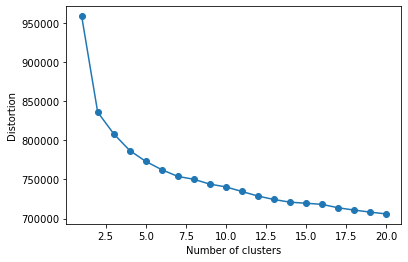

In [166]:
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(user_item_matrix)
    distortions.append(km.inertia_)

print(distortions)
    
# plot
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [167]:
#cold start

import pandas as pd
from sklearn.cluster import KMeans

# Load the user-item interaction data

# Create a matrix of user-item interactions
# user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating')
# user_item_matrix = user_item_matrix.fillna(0)

user_item_matrix = matrix_id.copy()
user_item_matrix = user_item_matrix.fillna(0)

# Train the KMeans model
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(user_item_matrix)

# Predict the cluster for a first time user
new_user = [0]*1328
first_time_user_cluster = kmeans.predict([new_user])[0]

print(first_time_user_cluster)
print(user_item_matrix.T)

# # Recommend items based on the cluster of the first time user
# recommended_items = []
# for item_id, item in enumerate(user_item_matrix.T):
#     print(item_id, item)
#     if item[first_time_user_cluster] > 3:
#         recommended_items.append(item_id)

# for i in enumerate(user_item_matrix):
#     print(i)

# print("Recommended items for the first time user: ", recommended_items)

print(kmeans.labels_)

cluster_users = [i for i, label in enumerate(kmeans.labels_) if label == first_time_user_cluster]

print('cluster_users',cluster_users)

print(user_item_matrix.columns)

# Recommend items based on the first-time user's cluster
recommended_items = []
# for i, row in enumerate(user_item_matrix.T):
#     if kmeans.labels_[i] in cluster_users:
#         print(i, row, user_item_matrix.T.columns[i])
#         if sum(row >= 3) >= 3:
#             recommended_items.append(user_item_matrix.columns[i])

# recommended_items = []
# for i, row in enumerate(user_item_matrix.T):
#     #print(i, row)
#     if i in cluster_users:
#         print(row)

# for i in range(len(user_item_matrix.T)):
#     print(user_item_matrix.T.iloc[i])

item_user_matrix = user_item_matrix.T.iloc[:, cluster_users]
print(item_user_matrix)

for i, mid in enumerate(item_user_matrix):
    row = item_user_matrix.iloc[i]
    #print((row >= 5).sum())

average_ratings = item_user_matrix.mean(axis=1)
print(average_ratings)
print(len(average_ratings))

N=10
top_N_items = average_ratings.sort_values(ascending=False).head(N).index

print("top 10 items", top_N_items)
print("Recommended items for first-time user: ", recommended_items)
print(kmeans.inertia_)

7
user_id   1    2    3    4    5    6    7    8    9    10   ...  934  935  \
movie_id                                                    ...             
2         3.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  0.0   
3         4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4         3.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  ...  5.0  0.0   
5         3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
6         5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1674      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1675      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1676      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1679      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1680      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 

In [168]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

# Load the ratings data
ratings_data = df_rating2.copy()

# Create a test set from the ratings data
test_set = ratings_data.sample(frac=0.2)

# Create a user-item matrix for the training data
train_set = ratings_data.drop(test_set.index)
user_item_matrix = train_set.pivot_table(index='user_id', columns='movie_id', values='rating')

# Replace NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Cluster the users using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(user_item_matrix)

# Find the closest cluster for each user in the test set
test_user_clusters = kmeans.predict(user_item_matrix.loc[test_set['user_id']])

# Recommend items for each user in the test set
recommended_items = {}
for i, user_id in enumerate(test_set['user_id']):
    # Find all users in the same cluster as the current user
    cluster_indices = np.where(kmeans.labels_ == test_user_clusters[i])[0]
    cluster_data = user_item_matrix.iloc[cluster_indices, :]
    
    # Calculate the average ratings for each item in the cluster
    average_ratings = cluster_data.mean(axis=0)
    
    # Recommend the top N items with the highest average ratings
    N = 10
    top_N_items = average_ratings.sort_values(ascending=False).head(N).index
    
    # Store the recommended items for the current user
    recommended_items[user_id] = top_N_items
    
print(len(top_N_items))    

# Calculate the F1-score for the recommendations
y_true = []
y_pred = []
print(test_set)
for user_id, items in recommended_items.items():
    true_ratings = test_set[(test_set['user_id'] == user_id) & (test_set['rating'] >= 4)].movie_id.tolist()
    print('true_ratings',true_ratings)
    print('items',items)
    y_true.extend(true_ratings)
    y_pred.extend(items)
f1 = f1_score(y_true, y_pred, average='micro')

# Print the F1-score
print("F1-score:", f1)

10
       user_id  movie_id  rating
98935      864       265       5
16368       13       377       1
88858      727       111       3
46871      655       187       5
1400       201       209       3
...        ...       ...     ...
20523      299       288       3
23734      269       204       2
4842       327       133       4
34714      387        79       4
2481       234       482       4

[5562 rows x 3 columns]
true_ratings [265, 102, 134, 202, 91, 736, 174, 993, 229, 82, 157, 184, 1101, 56, 542, 178, 12, 96, 232, 48, 87, 234, 239, 5, 625, 286, 204, 218, 523, 511, 186, 715, 136, 805, 47, 273, 161, 215, 124, 526, 283, 145, 172]
items Int64Index([22, 64, 181, 69, 195, 174, 96, 79, 98, 568], dtype='int64', name='movie_id')
true_ratings [234, 211, 736, 775, 492, 463, 118, 720, 811, 449, 750, 809, 654, 478, 174, 197, 14, 516, 239, 183, 42, 519, 517, 491, 472, 462, 797, 226, 237, 520, 228, 527, 675, 87, 64, 522, 285, 430, 494, 302, 789, 896, 227, 429]
items Int64Index([647, 208, 100

ValueError: Found input variables with inconsistent numbers of samples: [2773, 780]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

# Load the ratings data
ratings_data = df_rating2.copy()

# Create a test set from the ratings data
test_set = ratings_data.sample(frac=0.2)

# Create a user-item matrix for the training data
train_set = ratings_data.drop(test_set.index)
user_item_matrix = train_set.pivot_table(index='user_id', columns='movie_id', values='rating')

# Replace NaN values with 0
user_item_matrix.fillna(0, inplace=True)

# Cluster the users using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(user_item_matrix)

# Find the closest cluster for each user in the test set
#test_user_clusters = kmeans.predict(user_item_matrix.loc[test_set['user_id
                                                                  
test_user_ids = set(test_set['user_id'].unique())
matrix_user_ids = set(user_item_matrix.index)
common_user_ids = test_user_ids & matrix_user_ids

print(len(test_user_ids))
print(len(common_user_ids))


test_user_clusters = kmeans.predict(user_item_matrix.loc[list(common_user_ids)])


# Recommend items for each user in the test set
recommended_items = {}
for i, user_id in enumerate(common_user_ids):
    # Find all users in the same cluster as the current user
    cluster_indices = np.where(kmeans.labels_ == test_user_clusters[i])[0]
    cluster_data = user_item_matrix.iloc[cluster_indices, :]
    
    # Calculate the average ratings for each item in the cluster
    average_ratings = cluster_data.mean(axis=0)
    
    # Recommend the top N items with the highest average ratings
    N = 10
    top_N_items = average_ratings.sort_values(ascending=False).head(N).index
    
    # Store the recommended items for the current user
    recommended_items[user_id] = top_N_items
    
print(len(top_N_items))   
print(top_N_items)

# # Calculate the F1-score for the recommendations
# y_true = []
# y_pred = []
# print(test_set)
# for user_id, items in recommended_items.items():
#     true_ratings = test_set[(test_set['user_id'] == user_id) & (test_set['rating'] >= 4)].movie_id.tolist()
#     print('true_ratings',true_ratings)
#     print('items',items)
#     y_true.extend(true_ratings)
#     y_pred.extend(items)
# f1 = f1_score(y_true, y_pred, average='micro')

# # Print the F1-score
# print("F1-score:", f1)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

# Load the ratings data
ratings_data = df_rating2.copy()

